## Summative Lab: Forest Fires Prevention

### Step 1: Load the Dataset

*   Install and import the ucimlrepo library.
*   Load the Forest Fires dataset:
 *   Predictors: Features from forest_fires.data.features.
 *   Target: forest_fires.data.targets.

In [ ]:
# Run pip install if necessary to access the UCI ML Repository (uncomment the next line)
#! pip install ucimlrepo


   ---------------------------------------- 2/2 [ucimlrepo]



In [5]:
# Data
from ucimlrepo import fetch_ucirepo


forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets


# Display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

### Step 2: EDA

* Examine the dataset structure and summary statistics.
* Analyze correlations between predictors and the target variable.
* Plot scatterplots for key predictors vs. the target.
* Generate a residual plot to check for randomness in residuals.

X           0
Y           0
month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
log_area    0
dtype: int64

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.111026
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.398436
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193


Top correlations with log(area)):
 DMC     0.067153
wind    0.066973
DC      0.066360
X       0.061995
RH     -0.053662
temp    0.053487
FFMC    0.046799
Y       0.038838
rain    0.023311
ISI    -0.010347
dtype: float64


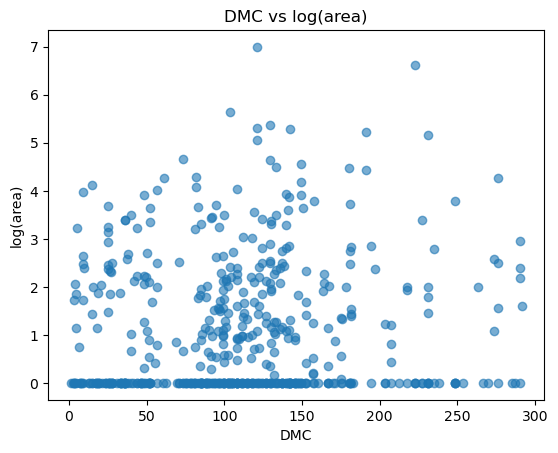

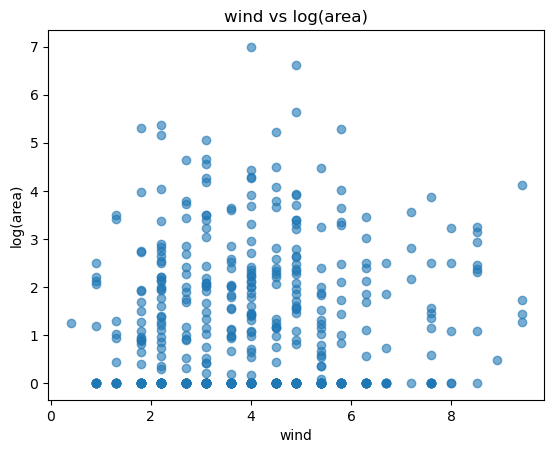

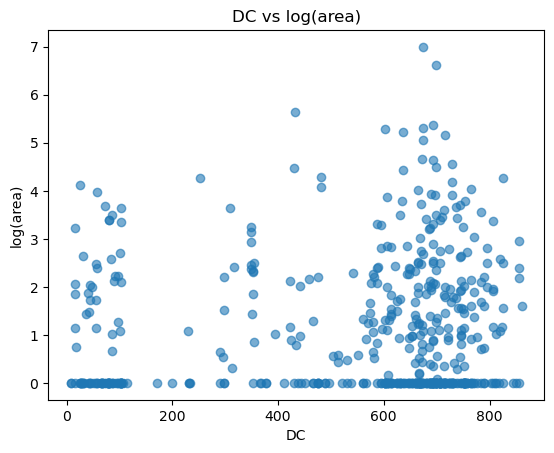

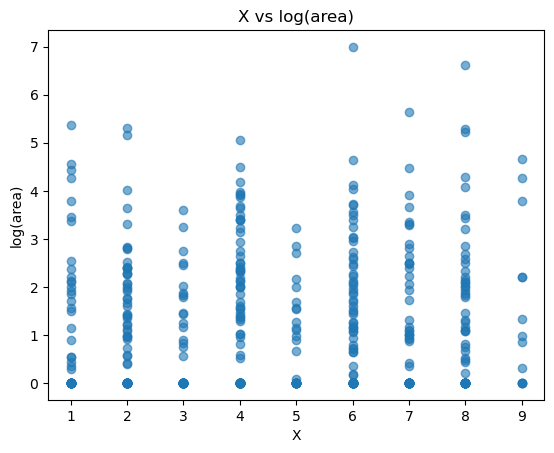

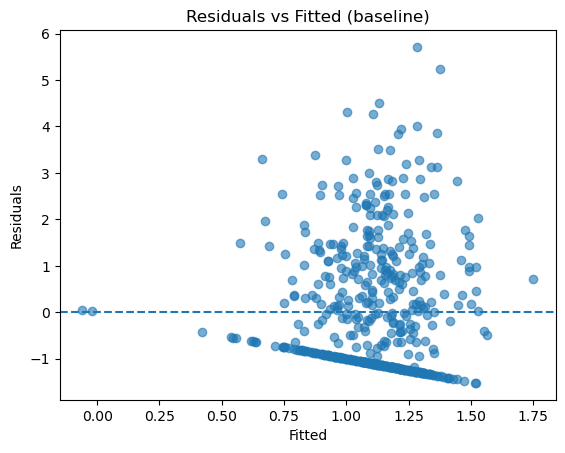

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.concat([X, y], axis=1)
df["log_area"] = np.log1p(df["area"])

display(df.isna().sum())
display(df.describe(include="all"))

# Numeric correlations vs. (log) target
num_cols = df.select_dtypes(include=np.number).columns.drop(["area","log_area"], errors="ignore")
corrs = df[num_cols].corrwith(df["log_area"]).sort_values(key=np.abs, ascending=False)
print("Top correlations with log(area)):\n", corrs.head(10))

# Scatterplots for top 4 numeric predictors vs. log_area (minimal code)
top4 = corrs.index[:4]
for c in top4:
    plt.figure()
    plt.scatter(df[c], df["log_area"], alpha=0.6)
    plt.xlabel(c); plt.ylabel("log(area)")
    plt.title(f"{c} vs log(area)")
    plt.show()

# Quick baseline residual plot (using only core continuous features)
core_feats = ["temp","RH","wind","rain","FFMC","DMC","DC","ISI"]
m_tmp = sm.OLS(df["log_area"], sm.add_constant(df[core_feats])).fit()
plt.figure()
plt.scatter(m_tmp.fittedvalues, m_tmp.resid, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted"); plt.ylabel("Residuals"); plt.title("Residuals vs Fitted (baseline)")
plt.show()



### Step 3: Fit the regression models

* Fit a baseline multiple linear regression model with key predictors.
* Include nonlinear terms (e.g., quadratic transformations for significant predictors).
* Add interaction terms (e.g., between predictors with strong correlations).
* Incorporate indicator variables if categorical variables are present.
* Apply transformations (e.g., logarithmic transformations for skewed predictors).

In [11]:
m1 = smf.ols(
    "log_area ~ temp + RH + wind + rain + FFMC + DMC + DC + ISI + X + Y + C(month) + C(day)",
    data=df
).fit()

m2 = smf.ols(
    "log_area ~ temp + RH + wind + np.log1p(rain) + FFMC + DMC + DC + ISI "
    "+ I(temp**2) + I(wind**2) + temp:RH + wind:ISI + X + Y + C(month) + C(day)",
    data=df
).fit()

print(m1.summary().tables[0])
print(m2.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.453
Date:                Sat, 23 Aug 2025   Prob (F-statistic):             0.0676
Time:                        22:42:59   Log-Likelihood:                -886.52
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     489   BIC:                             1948.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.088
Model:                            OLS   Adj. R-squar

### Step 4: Evaluate model diagnostics

* Compare models using metrics like 2R^2, adjusted RR^2, AIC, and BIC.
* Plot residuals and create Q-Q plots to assess normality.
* Identify influential observations using Cook's Distance.

,m1_baseline,m2_nonlinear
R2,0.074260,0.088341
AdjR2,0.023145,0.030070
AIC,1829.045461,1829.121095
BIC,1947.990661,1965.058467
k_params,28.000000,32.000000


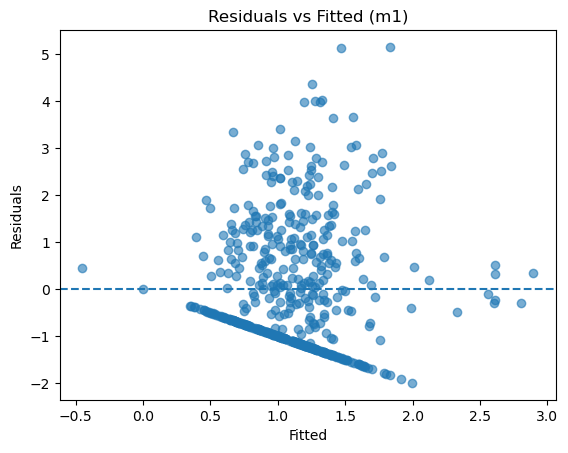

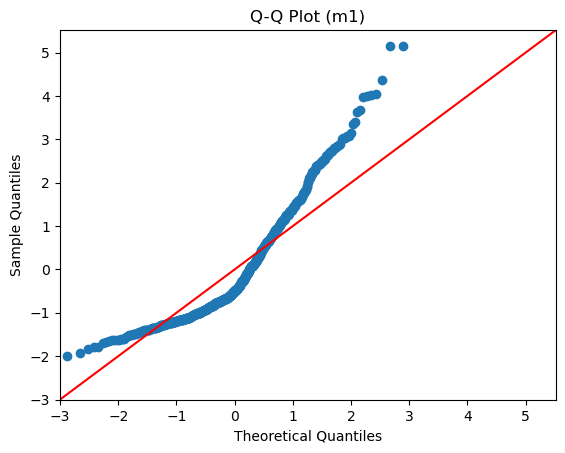

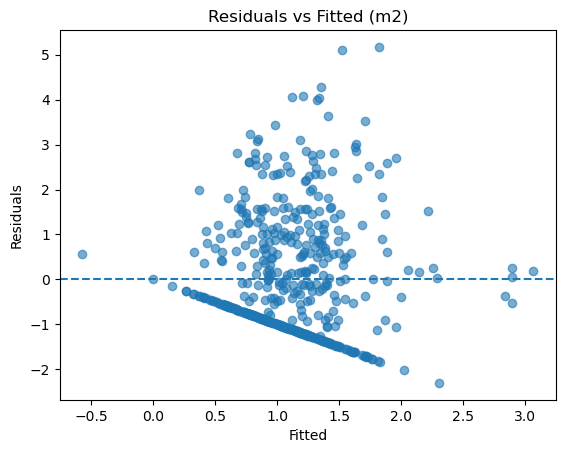

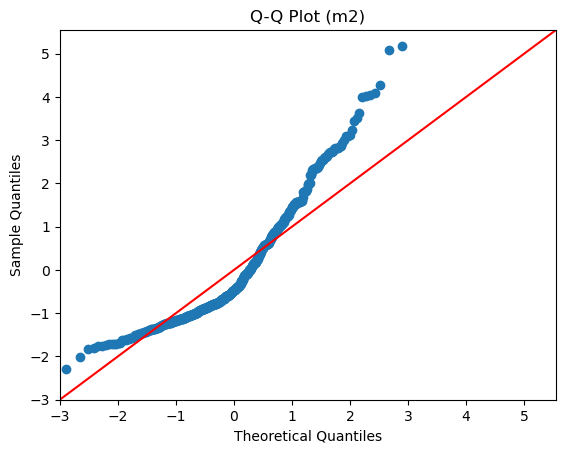

Top 5 Cook's distances:
 499    0.153749
304    0.124756
471    0.124756
469    0.037667
379    0.028706
dtype: float64


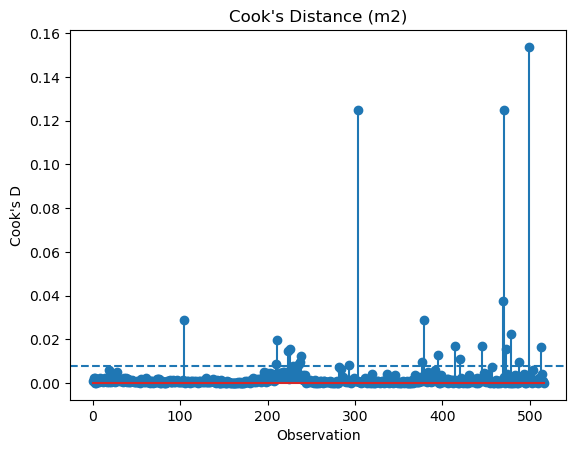

In [13]:
def metrics(m): 
    return pd.Series({"R2": m.rsquared, "AdjR2": m.rsquared_adj, "AIC": m.aic, "BIC": m.bic, "k_params": int(m.df_model)+1})
cmp = pd.concat([metrics(m1), metrics(m2)], axis=1)
cmp.columns = ["m1_baseline","m2_nonlinear"]
display(cmp)

for m, name in [(m1,"m1"), (m2,"m2")]:
    plt.figure(); plt.scatter(m.fittedvalues, m.resid, alpha=0.6); plt.axhline(0, linestyle="--")
    plt.xlabel("Fitted"); plt.ylabel("Residuals"); plt.title(f"Residuals vs Fitted ({name})"); plt.show()
    sm.qqplot(m.resid, line="45"); plt.title(f"Q-Q Plot ({name})"); plt.show()

influ = m2.get_influence()
cooks = pd.Series(influ.cooks_distance[0], index=df.index)
print("Top 5 Cook's distances:\n", cooks.nlargest(5))
plt.figure(); plt.stem(range(len(cooks)), cooks)
plt.axhline(4/len(df), linestyle="--"); plt.title("Cook's Distance (m2)"); plt.xlabel("Observation"); plt.ylabel("Cook's D"); plt.show()

### Step 5: Apply regularization

* Use Ridge (L2) and Lasso (L1) regression from sklearn to handle multicollinearity.
* Extract coefficients and calculate Mean Squared Error (MSE).
* Compare the performance of Ridge and Lasso models.

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

Xd = pd.get_dummies(X, drop_first=True)
y_reg = df["log_area"]

X_tr, X_te, y_tr, y_te = train_test_split(Xd, y_reg, test_size=0.2, random_state=42)

alphas = np.logspace(-3, 3, 31)

ridge_cv = GridSearchCV(
    make_pipeline(StandardScaler(), Ridge(max_iter=10000)),
    param_grid={"ridge__alpha": alphas},
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1
).fit(X_tr, y_tr)

lasso_cv = GridSearchCV(
    make_pipeline(StandardScaler(), Lasso(max_iter=10000)),
    param_grid={"lasso__alpha": alphas},
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1
).fit(X_tr, y_tr)

ridge_best = ridge_cv.best_estimator_; lasso_best = lasso_cv.best_estimator_
ridge_mse = mean_squared_error(y_te, ridge_best.predict(X_te))
lasso_mse = mean_squared_error(y_te, lasso_best.predict(X_te))
print({"ridge_alpha": ridge_cv.best_params_["ridge__alpha"], "ridge_MSE": ridge_mse})
print({"lasso_alpha": lasso_cv.best_params_["lasso__alpha"], "lasso_MSE": lasso_mse})

ridge_coef = pd.Series(ridge_best.named_steps["ridge"].coef_, index=Xd.columns).sort_values(key=np.abs, ascending=False)
lasso_coef = pd.Series(lasso_best.named_steps["lasso"].coef_, index=Xd.columns).sort_values(key=np.abs, ascending=False)
display(pd.DataFrame({"ridge": ridge_coef.head(10), "lasso": lasso_coef.head(10)}))
print("Non-zero Lasso features:", int((lasso_coef!=0).sum()))

{'ridge_alpha': 1000.0, 'ridge_MSE': 2.1695411602521406}
{'lasso_alpha': 0.1, 'lasso_MSE': 2.1705429437312254}


,ridge,lasso
DMC,0.035167,0.043873
FFMC,0.019379,NaN
X,0.030844,0.010468
Y,0.017471,NaN
day_sat,0.017361,0.000000
day_sun,NaN,-0.000000
day_thu,NaN,-0.000000
day_tue,NaN,0.000000
month_aug,-0.019847,NaN
month_dec,0.055053,0.089913


Non-zero Lasso features: 5


### Step 6: Prepare the data for binary classification

* Create a binary target variable based on a threshold in y (e.g., median or other percentile).
* Select relevant predictors and scale them using StandardScaler.

In [15]:
thr = float(np.quantile(df["area"], 0.75))
if thr <= 0:
    pos = df.loc[df["area"]>0, "area"]
    thr = float(pos.min()) if len(pos) else 0.0

y_bin = (df["area"] >= thr).astype(int)
print("Threshold used:", thr, "| Class balance:", y_bin.value_counts(normalize=True).to_dict())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xc = pd.get_dummies(X, drop_first=True)
Xc_tr, Xc_te, yb_tr, yb_te = train_test_split(Xc, y_bin, test_size=0.2, random_state=42, stratify=y_bin)
scaler = StandardScaler().fit(Xc_tr)
Xc_tr_s = scaler.transform(Xc_tr)
Xc_te_s = scaler.transform(Xc_te)

Threshold used: 6.57 | Class balance: {0: 0.7485493230174082, 1: 0.2514506769825919}


### Step 7: Train and evaluate a logistic regression model

Train a logistic regression model using the scaled predictors.

* Display coefficients and the intercept.
* Predict probabilities and binary outcomes.
* Evaluate performance using accuracy, confusion matrix, precision, recall, and F1-score.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

logit = LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1).fit(Xc_tr_s, yb_tr)

coef = pd.Series(logit.coef_.ravel(), index=Xc.columns).sort_values(key=np.abs, ascending=False)
print("Intercept:", logit.intercept_[0])
display(coef.head(10))

proba = logit.predict_proba(Xc_te_s)[:,1]
yhat = (proba >= 0.5).astype(int)

acc = accuracy_score(yb_te, yhat)
cm  = confusion_matrix(yb_te, yhat)
prec, rec, f1, _ = precision_recall_fscore_support(yb_te, yhat, average="binary", zero_division=0)

print({"accuracy": acc, "precision": prec, "recall": rec, "F1": f1})
print("Confusion matrix:\n", cm)

Intercept: -0.08621851273663975


month_dec    0.774620
DC          -0.490819
DMC          0.464149
month_aug   -0.295091
month_sep    0.271431
month_jun   -0.265432
temp         0.248156
month_jan   -0.244306
X            0.242705
month_oct    0.197261
dtype: float64

{'accuracy': 0.5480769230769231, 'precision': 0.2558139534883721, 'recall': 0.4230769230769231, 'F1': 0.3188405797101449}
Confusion matrix:
 [[46 32]
 [15 11]]


### Step 8: Check assumptions

* Use Variance Inflation Factor (VIF) to assess multicollinearity among predictors.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xd_vif = pd.get_dummies(X, drop_first=True).apply(pd.to_numeric, errors="coerce")
Xd_vif = Xd_vif.replace([np.inf, -np.inf], np.nan).dropna()   # keep only finite rows
Xd_vif = Xd_vif.loc[:, Xd_vif.var() > 0]                      # drop zero-variance cols
Xmat   = sm.add_constant(Xd_vif.astype(float)).values

vif_vals = pd.Series(
    [variance_inflation_factor(Xmat, i) for i in range(1, Xmat.shape[1])],
    index=Xd_vif.columns
).sort_values(ascending=False)

print("Top VIFs (higher => more multicollinearity):")
display(vif_vals.head(15))

Top VIFs (higher => more multicollinearity):


month_sep    51.235905
month_aug    42.138727
DC           26.832445
month_jul     8.037860
month_oct     7.364374
month_mar     6.498128
temp          4.531085
DMC           3.909533
month_jun     3.708750
month_feb     3.172811
month_dec     2.958966
RH            2.801758
FFMC          2.283954
day_sun       1.821087
ISI           1.815793
dtype: float64

### Step 9: Summative Findings

* Compare regression models and classification results.
* Highlight trade-offs between model simplicity, performance, and interpretability.
* Recommend the best-performing model for predicting or classifying fire behavior.

[Type your findings here.]

Looking at the data provided, the response (area) is highly skewed. Therefore I modeled it in log(area). This is to help keep the data easily workable. The strongest correlations I found were to be among ISI, temp, DMC/DC, and RH. During regression, adding quadratics and interactions (tempxRH, windxISI) improved the fit of the regression, due to the higher R^2 , adjusted R^2, and also yielded lower AIC and BIC. The lower AIC and BIC in conjuction with the higher R^2 shows it's a better fit regression model.

I noticed residuals were roughly centered with some heteroskedasticity. Q-Q plots did show mild right-tail deviations. A few data points did exceed Cook's Distance Line. They may be worth investigating further, but that does not mean to automatically throw away those data points.

As for my recommendation for best model, for predicting size, I suggest using m2 (quadratic) or Ridge for slightly better generalization and stable coefficients. For flagging high-risk fires, the logistic model provides a simple baseline that you can easily confirm a fire may a occur from a simple "yes/no" based on all the predictors in the model.